<a href="https://colab.research.google.com/github/Akramkhan01/-Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
## **During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such**
## **web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement**
## **(suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.**
# **Data Information**
## **The Book-Crossing dataset comprises 3 files.**
#● **Users**
## **Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.**
#● **Books**
## **Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.**
#● **Ratings**
## **Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.**

In [1]:
#Importing libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data

In [3]:
## loading book data set
books = pd.read_csv('/content/drive/MyDrive/Books Recoomendation System - Akram Khan/data_book_recommendation/Books.csv')

In [4]:
## loading users data set
users = pd.read_csv('/content/drive/MyDrive/Books Recoomendation System - Akram Khan/data_book_recommendation/Users.csv')

In [5]:
## loading Ratings data set
ratings = pd.read_csv('/content/drive/MyDrive/Books Recoomendation System - Akram Khan/data_book_recommendation/Ratings.csv')

# Books Data - Pre Processing

In [6]:
books.shape

(271360, 8)

In [7]:
list(books.columns)

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L']

In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
## Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

there are some nulll values which need to be treated

In [12]:
books.duplicated().any()

False

There are no duplicates

In [13]:
# droping the url columns 
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
# finding the null values ni book author
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [15]:
# finding the null values in publisher
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [16]:
# replacing the null values of book author and publisher with unknown
books['Book-Author'].fillna('Unknown',inplace=True)
books['Publisher'].fillna('Unknown',inplace=True)

In [17]:
# Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


year of publication should be an integer lets check that

In [19]:
pd.set_option('display.max_colwidth', -1)

In [20]:
# Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

has two text values and one two zero and some books that have future date of publication

In [21]:
# finding the books with Year-Of-Publication as 0
books[books['Year-Of-Publication'] == '0']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
196656,3442035368,Ich Gestehe,Heinz G. Konsalik,0,Wilhelm Goldmann Verlag GmbH
196678,0553124803,Being There,Jerzy Kosinski,0,Bantam Doubleday Dell
196680,888274387X,Vaniglia E Cioccolato,Modignani Casati,0,Sperling Paperback
196685,033368155X,Surreal Lives the Surrealists 1945,Ruth Brandon,0,Humanity Press/prometheus Bk
196734,0207158452,Games of the Strong,Glenda Adams,0,Harpercollins Publisher
...,...,...,...,...,...
261929,0760700702,100 Great Archaeological Discoveries,Paul G Bahn,0,Barnes Noble Inc
261930,0760701962,UFO's: A Scientific Debate,Carl Sagan,0,Barnes Noble Books
261931,0760706379,Only Way to Cross,John Maxtone Graham,0,Barnes Noble
262120,0880292288,New York Times Guide to Reference Materials,Mona Mccormick,0,Dorset House Publishing Co Inc


In [24]:
# finding the book record location for which yearOfPublication is  'DK Publishing Inc'
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [25]:
# finding the books with Year-Of-Publication as Gallimard
books[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections

In [26]:
# finding the book title of the following publisher
list(books[(books['Year-Of-Publication'] == 'DK Publishing Inc')|( books['Year-Of-Publication'] == 'Gallimard')]['Book-Title'])

['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
 'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"',
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"']

In [27]:
# replacing all suspicios data to relavent data 
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Boofksf Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = 2003
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [28]:
# converting the data type
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [29]:
from datetime import date
# finding the current year
current_year = date.today().year
print(current_year)

2022


In [30]:
# finding books with date of publication greater than current date 
books.loc[(books['Year-Of-Publication'] > current_year)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS),Coville,2030,Aladdin
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS),Bruce Coville,2030,Aladdin
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic
80264,0140301690,Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books),Lewis Carroll,2050,Puffin Books
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
192993,0870446924,"Field Guide to the Birds of North America, 3rd Ed.",National Geographic Society,2030,National Geographic
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books


In [31]:
# replacing year of publication 0 and greater than 2021 to mean of the data set 
books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan
books.fillna(round(books['Year-Of-Publication'].mean()),inplace=True)

In [32]:
# Checking for column Year-of-publication
books['Year-Of-Publication'].describe()

count    271360.000000
mean     1993.693241  
std      8.249980     
min      1376.000000  
25%      1989.000000  
50%      1995.000000  
75%      2000.000000  
max      2021.000000  
Name: Year-Of-Publication, dtype: float64

In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


# User Data

In [36]:
# extracting top 5 observations
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
users.shape

(278858, 3)

In [38]:
# Checking null values
users.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

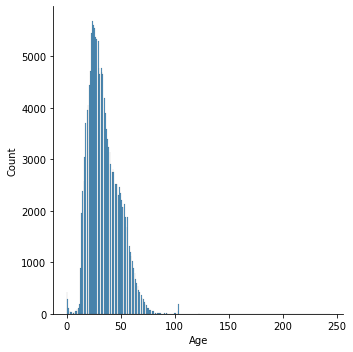

In [39]:
sns.displot(users.Age)

there are few people which are above 100 age which might be outliers

In [40]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [41]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

Ratings Data

In [42]:
# extracting top 5 observations
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [43]:
# Checking for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [44]:
# combning all the data frames
df = pd.merge(books, ratings, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,"stockton, california, usa",18.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34.751434
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,"timmins, ontario, canada",34.751434
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,"timmins, ontario, canada",34.751434
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",34.751434


In [45]:
# finding the unique locations 
df['Location'].str.split(',', expand=True)[3].unique()

array([None, ' usa', ' united kingdom', ' philippines', ' france',
       'guishan li', ' canada', ' guam-dong', ' nigeria', ' indonesia',
       ' japan', ' georgia', ' spain', ' south korea', '', ' iceland',
       ' kansas', ' ireland', ' greece"', ' new zealand', ' malaysia',
       ' portugal', ' british columbia', ' italy', ' ontario', ' finland',
       ' singapore', ' germany', ' channel islands', ' tobago',
       ' austria', ' afghanistan', ' australia', ' deutschland',
       ' switzerland', ' mexico', ' galiza', ' c.a.', ' denmark',
       ' china', ' guam', ' cape verde', ' honduras', ' united states',
       'italy', ' disgruntled states of america', ' england', ' the',
       ' rhode island', ' netherlands', ' gifu', ' the world tomorrow'],
      dtype=object)

# Data Visualization

# Uni Variate Analysis

In [46]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,"stockton, california, usa",18.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34.751434
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,"timmins, ontario, canada",34.751434
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,"timmins, ontario, canada",34.751434
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",34.751434


In [47]:
df.shape

(1031136, 9)

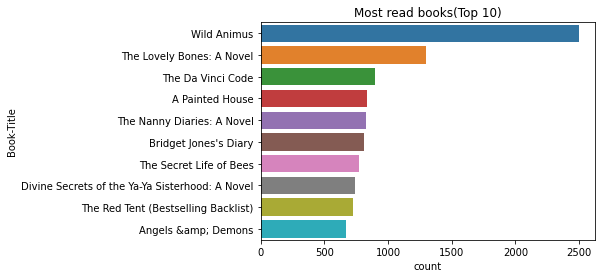

In [48]:
#  ploting graph of most read books 
sns.countplot(y="Book-Title", data=df, order=df['Book-Title'].value_counts().index[0:10])
plt.title("Most read books(Top 10)")
plt.show()

In [49]:
df['Book-Title'].value_counts().count()

241071

Observation

* We have 241071 unique Book Title.






* The most read book is WIld animus with almost 2500 reads

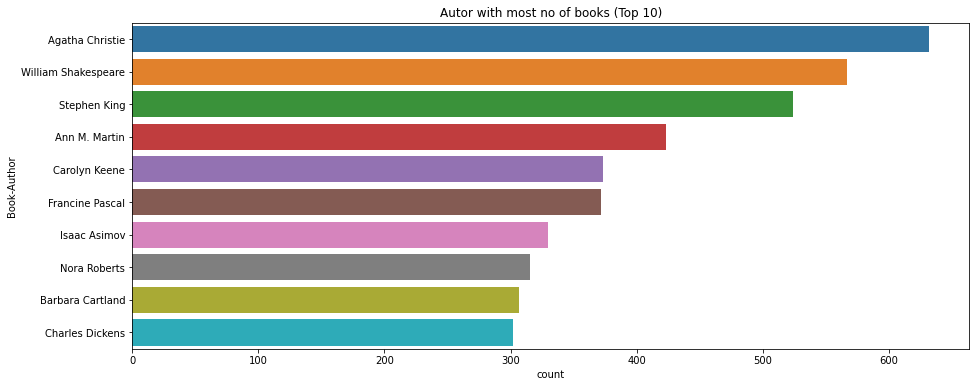

In [53]:
# plot of top 10 authors with most no of books
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:10])
plt.title("Autor with most no of books (Top 10)")
plt.show()

observation

* The author with most no of boks is agatha cristie with almost 650 books

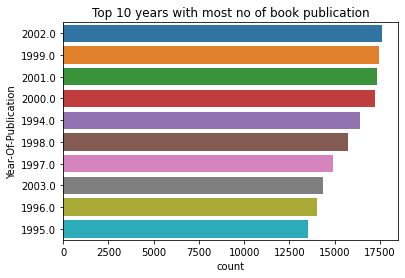

In [57]:
# plot for most no of books publised in a year
sns.countplot(y="Year-Of-Publication", data=books,order=books['Year-Of-Publication'].value_counts().index[:10])
plt.title('Top 10 years with most no of book publication')
plt.show()

most of the books are published between 1999 and 2002

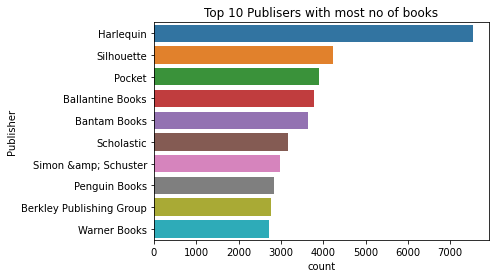

In [56]:
# Top 10 Publisers with most no of books
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:10])
# setting title
plt.title('Top 10 Publisers with most no of books')
plt.show()

Harlequin publisher has published modt no of books witha a total count more than 7500

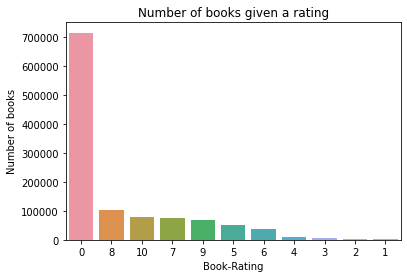

In [59]:
# Number of books given a rating
sns.countplot(x="Book-Rating", data=ratings,order=ratings['Book-Rating'].value_counts().index[:])
# setting title
plt.title('Number of books given a rating')
# setting lables for y axis
plt.ylabel('Number of books')
plt.show()

In [60]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10    78610 
7     76457 
9     67541 
5     50974 
6     36924 
4     8904  
3     5996  
2     2759  
1     1770  
Name: Book-Rating, dtype: int64

# More than 700000 books have 0 rating

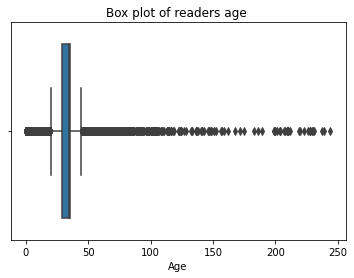

In [61]:
# Checking the Outliers in Age.
sns.boxplot(users.Age)
# setting title
plt.title('Box plot of readers age ')
plt.show()

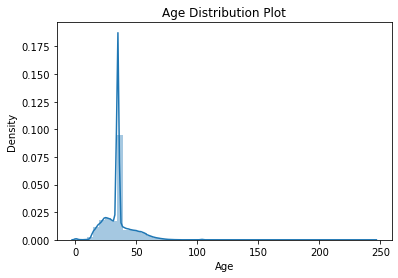

In [64]:
#ploting Distribution polt for age column
sns.distplot(users.Age)
# setting title
plt.title('Age Distribution Plot')
plt.show()

some users age is more than 100 wich is a outlier

In [66]:
# First we are filling the nan value where the age is greater than 90 and less than 5 then replacing the nan with mean value.
users.loc[(users['Age'] > 100) | (users['Age'] < 5), 'Age']= np.NAN
users['Age']= users['Age'].fillna((users['Age'].mean()))

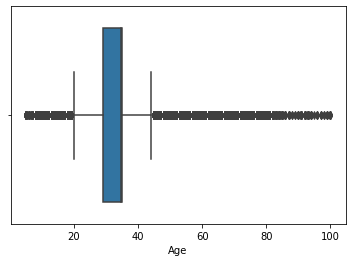

In [68]:
sns.boxplot(users.Age)
plt.show()

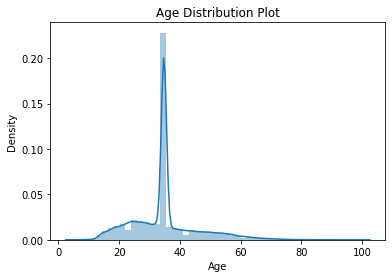

In [70]:
#ploting Distribution polt for age column
sns.distplot(users.Age)
# setting title
plt.title('Age Distribution Plot')
plt.show()

In [71]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,"stockton, california, usa",18.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34.751434
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,"timmins, ontario, canada",34.751434
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,"timmins, ontario, canada",34.751434
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",34.751434


In [72]:
age_rating=df.groupby('Age')['Book-Rating'].mean().reset_index()
# First we are filling the nan value where the age is greater than 90 and less than 5 then replacing the nan with mean value.
age_rating.loc[(age_rating['Age'] > 100) | (age_rating['Age'] < 5), 'Age']= np.NAN
age_rating['Age']= age_rating['Age'].fillna(round(age_rating['Age'].mean()))
age_rating.head()

,Age,Book-Rating
0,51.0,2.859180
1,51.0,3.464953
2,51.0,4.214953
3,51.0,4.923077
4,51.0,4.630996


In [73]:
from wordcloud import WordCloud

In [74]:
temp_df_books=df.groupby('Book-Title').agg({'Book-Rating':'mean','Book-Title':'count'}).rename(columns={'Book-Title':'count','Book-Rating':'avg_Book_Rating'}).reset_index()


In [75]:
temp_df_books=temp_df_books[temp_df_books['count']>100]